# Chapter 3.6: How might the virus spread in the future?

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from functions import calculate_infection, detection_plot, clean_deaths, clean_cases
from scipy.optimize import curve_fit

In [2]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [3]:
deaths_df = clean_deaths(deaths_df)

In [4]:
deaths_df_HR = deaths_df.iloc[362,:]
deaths_df_HR = deaths_df_HR.reset_index()
index_val = len(deaths_df_HR.index)

In [5]:
calculate_infection(deaths_df_HR, index_val)

In [6]:
deaths_df_HR = deaths_df_HR[0:-18]

# Miami-Dade County

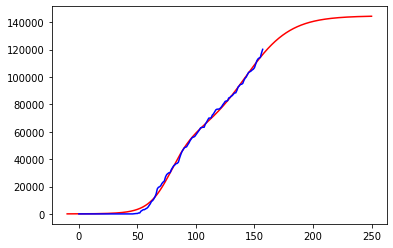

In [7]:
def logistic(x, midpoint=0, rate=.8, maximum=1):
    return maximum / (1 + np.exp(-rate * (x - midpoint)))

x = np.linspace(-6, 10, 1000)
y = logistic(x)# + logistic(x, midpoint=6, rate=2, maximum=5)



def double_log(x, x1, r1, m1, x2, r2, m2):
    return logistic(x, x1, r1, m1) + logistic(x, x2, r2, m2)


popt1, _ = curve_fit(logistic, range(0,158),  deaths_df_HR['total_infections'], p0=[0,0,0])

popt2, _ = curve_fit(double_log, range(0,158), deaths_df_HR['total_infections'], p0=[0,0,0,0,0,0])

xmodel = np.linspace(-10, 250, 1000)
ymodel1 = logistic(xmodel, *popt1)

ymodel2 = double_log(xmodel, *popt2)

plt.plot(xmodel, ymodel2, 'r')
plt.plot(range(0,158), deaths_df_HR['total_infections'], 'b')



In [8]:
deaths_df_CK = deaths_df.iloc[610,:]
deaths_df_CK = deaths_df_CK.reset_index()
index_val = len(deaths_df_CK.index)

In [9]:
calculate_infection(deaths_df_CK, index_val)

In [10]:
deaths_df_CK = deaths_df_CK[0:-18]

# Cook County

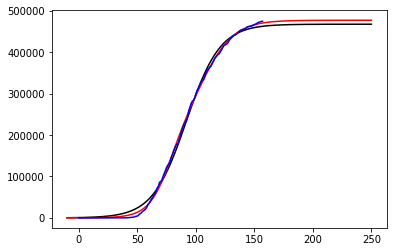

In [11]:
def logistic(x, midpoint=0, rate=.8, maximum=1):
    return maximum / (1 + np.exp(-rate * (x - midpoint)))

x = np.linspace(-6, 10, 1000)
y = logistic(x)# + logistic(x, midpoint=6, rate=2, maximum=5)



def double_log(x, x1, r1, m1, x2, r2, m2):
    return logistic(x, x1, r1, m1) + logistic(x, x2, r2, m2)


popt1, _ = curve_fit(logistic, range(0,158),  deaths_df_CK['total_infections'], p0=[0,0,0])

popt2, _ = curve_fit(double_log, range(0,158), deaths_df_CK['total_infections'], p0=[0,0,0,0,0,0])

xmodel = np.linspace(-10, 250, 1000)
ymodel1 = logistic(xmodel, *popt1)

ymodel2 = double_log(xmodel, *popt2)

plt.plot(xmodel, ymodel1, 'k')
plt.plot(xmodel, ymodel2, 'r')

plt.plot(range(0,158), deaths_df_CK['total_infections'], 'b')

In [12]:
deaths_df_LA = deaths_df.iloc[204,:]
deaths_df_LA = deaths_df_LA.reset_index()
index_val = len(deaths_df_LA.index)

In [13]:
calculate_infection(deaths_df_LA, index_val)

In [14]:
deaths_df_LA = deaths_df_LA[0:-18]

# Los Angeles County

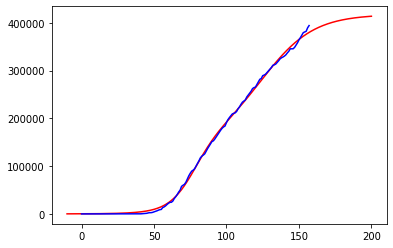

In [16]:
def logistic(x, midpoint=0, rate=.8, maximum=1):
    return maximum / (1 + np.exp(-rate * (x - midpoint)))

x = np.linspace(-6, 10, 1000)
y = logistic(x)# + logistic(x, midpoint=6, rate=2, maximum=5)



def double_log(x, x1, r1, m1, x2, r2, m2):
    return logistic(x, x1, r1, m1) + logistic(x, x2, r2, m2)


popt1, _ = curve_fit(logistic, range(0,158),  deaths_df_LA['total_infections'], p0=[0,0,0])

popt2, _ = curve_fit(double_log, range(0,158), deaths_df_LA['total_infections'], p0=[0,0,0,0,0,0], maxfev = 20000)

xmodel = np.linspace(-10, 200, 1000)
ymodel1 = logistic(xmodel, *popt1)

ymodel2 = double_log(xmodel, *popt2)


plt.plot(xmodel, ymodel2, 'r')

plt.plot(range(0,158), deaths_df_LA['total_infections'], 'b')